### Plot data for two halves of the experiment
Also, smooth the data, and calculate residuals (waves) and some statistics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a smoothing function
def boxcar_smooth_depth( df, fs=8.0, window_minutes=3.0 ):
    """
    Apply a running-mean (boxcar) filter to depth data.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame with Time and dDepth columns
    fs : float
        Sampling frequency (Hz)
    window_minutes : float
        Window length in minutes

    Returns
    -------
    depth_smooth = numpy array of smoothed data
    """

    # Window length in samples
    N = int(window_minutes * 60 * fs)

    # Boxcar kernel
    kernel = np.ones(N) / N

    # Apply convolution (centered)
    depth_smooth = np.convolve(
        df["Depth"].to_numpy(),
        kernel,
        mode="same"
    )

    half = N // 2
    depth_smooth[:half] = np.nan
    depth_smooth[-half:] = np.nan

    return depth_smooth


In [3]:
# Our value of atmospheric pressure is ?
p_atmos = 10.14901 # decibars - replace with value from our notes
g = 9.80665 # gravitational acceleration (m s^-2)
rhow = 1024 # density of saltwater (kg m^3) - replace with our measured value when we move to saltwater
# offsets from bucket tests...add to the data
y_off = 0.052315299220260306
b_off = 0.038986075190029265
g_off = 0.07080629642164082
r_off = 0.06694348874839333

# Full pathname to location of data file (replace this with correct location on your computer)
data_dir = "/Users/sophiafamely/Documents/ScienceFair2526/"

# file names
yellow_file = "/Users/sophiafamely/Documents/ScienceFair2526/Data/YellowData.txt"
blue_file =   "/Users/sophiafamely/Documents/ScienceFair2526/Data/BlueData.txt"
green_file = "/Users/sophiafamely/Documents/ScienceFair2526/Data/GreenData.txt"
red_file =    "/Users/sophiafamely/Documents/ScienceFair2526/Data/RedData.txt"

In [4]:
import pandas as pd
# Define time bounds - first location
start_time = "2025-11-09 10:05:00"
end_time   = "2025-11-09 10:56:00"

# Use pandas to read each csv file, and convert the time column into an index
# and repeat for all four sensors

# Yellow sensor
df = pd.read_csv(yellow_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + y_off
# rename the dataframe
df_yellow1 = df
df_yellow1["Smoothed Depth"] = boxcar_smooth_depth( df_yellow1, fs=8.0, window_minutes=3.0 ) 

# Blue sensor
df = pd.read_csv(blue_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + b_off
# rename the dataframe
df_blue1 = df
df_blue1["Smoothed Depth"] = boxcar_smooth_depth( df_blue1, fs=8.0, window_minutes=3.0 ) 


# Green sensor
df = pd.read_csv(green_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + g_off
# rename the dataframe
df_green1 = df
df_green1["Smoothed Depth"] = boxcar_smooth_depth( df_green1, fs=8.0, window_minutes=3.0 ) 


# Red sensor
df = pd.read_csv(red_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + r_off
# rename the dataframe
df_red1 = df
df_red1["Smoothed Depth"] = boxcar_smooth_depth( df_red1, fs=8.0, window_minutes=3.0 ) 

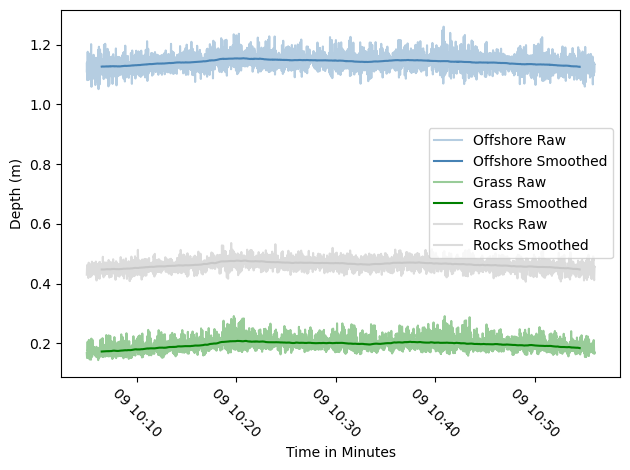

In [5]:
# make a plot of that data


plt.plot( df_blue1['Time'], df_blue1['Depth'],c='steelblue', label = 'Offshore Raw', alpha=0.4)
plt.plot( df_blue1['Time'], df_blue1['Smoothed Depth'],c='steelblue', label = 'Offshore Smoothed')

plt.plot( df_green1['Time'], df_green1['Depth'],c='green', label = 'Grass Raw', alpha=0.4)
plt.plot( df_green1['Time'], df_green1['Smoothed Depth'],c='green', label = 'Grass Smoothed')

plt.plot( df_red1['Time'], df_red1['Depth'],c='darkgray', label='Rocks Raw', alpha=0.4)
plt.plot( df_red1['Time'], df_red1['Smoothed Depth'],c='darkgray', label='Rocks Smoothed', alpha=0.4)

plt.ylabel( 'Depth (m)' )
plt.xlabel( 'Time in Minutes' )
plt.xticks(
    rotation=-45
)

plt.legend()
plt.tight_layout()
plt.savefig('Experiment1Graph.png',dpi=200)
plt.show()

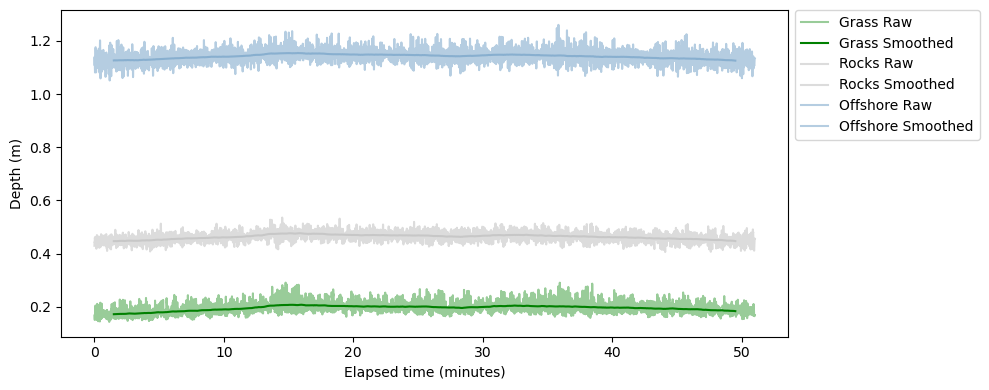

In [19]:

# Do same for the others
t0_blue1 = df_blue1['Time'].iloc[0]
t_min_blue1 = (df_blue1['Time'] - t0_blue1).dt.total_seconds().to_numpy()/60

t0_green1 = df_green1['Time'].iloc[0]
t_min_green1 = (df_green1['Time'] - t0_green1).dt.total_seconds().to_numpy()/60

t0_red1 = df_red1['Time'].iloc[0]
t_min_red1 = (df_red1['Time'] - t0_red1).dt.total_seconds().to_numpy()/60

# make a plot, replacing x-axis with the elapsed time arrays
plt.figure( figsize = (10,4) )

plt.plot( t_min_green1, df_green1['Depth'],c='green', label = 'Grass Raw', alpha=0.4)
plt.plot( t_min_green1, df_green1['Smoothed Depth'],c='green', label = 'Grass Smoothed')

plt.plot( t_min_red1, df_red1['Depth'],c='darkgray', label='Rocks Raw', alpha=0.4)
plt.plot( t_min_red1, df_red1['Smoothed Depth'],c='darkgray', label='Rocks Smoothed', alpha=0.4)

plt.plot( t_min_blue1, df_blue1['Depth'],c='steelblue', label='Offshore Raw', alpha=0.4)
plt.plot( t_min_blue1, df_blue1['Smoothed Depth'],c='steelblue', label='Offshore Smoothed', alpha=0.4)

plt.ylabel( 'Depth (m)' )
#plt.xticks(rotation=-45) # don't need to rotate the x-axis labels
plt.xlabel('Elapsed time (minutes)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.savefig('Experiment11Graph.png',dpi=200)
plt.tight_layout()
plt.show()

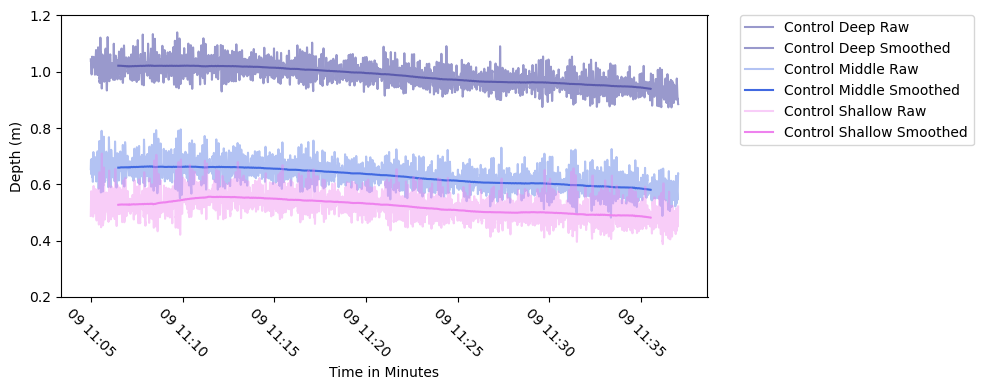

In [6]:
# Define time bounds - second location
start_time = "2025-11-09 11:05:00"
end_time   = "2025-11-09 11:37:00"

# Read each csv file, and convert the time column into an index
# and repeat for all four sensors

# Yellow sensor
df = pd.read_csv(yellow_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + y_off
# rename the dataframe
df_yellow2 = df
df_yellow2["Smoothed Depth"] = boxcar_smooth_depth( df_yellow2, fs=8.0, window_minutes=3.0 ) 

# Blue sensor
df = pd.read_csv(blue_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + b_off
# rename the dataframe
df_blue2 = df
df_blue2["Smoothed Depth"] = boxcar_smooth_depth( df_blue2, fs=8.0, window_minutes=3.0 ) 


# Green sensor
df = pd.read_csv(green_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + g_off
# rename the dataframe
df_green2 = df
df_green2["Smoothed Depth"] = boxcar_smooth_depth( df_green2, fs=8.0, window_minutes=3.0 ) 


# Red sensor
df = pd.read_csv(red_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + r_off
# rename the dataframe
df_red2 = df
df_red2["Smoothed Depth"] = boxcar_smooth_depth( df_red2, fs=8.0, window_minutes=3.0 ) 


# make a plot of that data with some improvements in the plotting
plt.figure( figsize = (10,4) )
plt.plot( df_red2['Time'], df_red2['Depth'],c='navy', label='Control Deep Raw', alpha=0.4)
plt.plot( df_red2['Time'], df_red2['Smoothed Depth'],c='navy', label='Control Deep Smoothed', alpha=0.4)

plt.plot( df_yellow2['Time'], df_yellow2['Depth'],c='royalblue', label = 'Control Middle Raw', alpha=0.4)
plt.plot( df_yellow2['Time'], df_yellow2['Smoothed Depth'],c='royalblue', label = 'Control Middle Smoothed')



plt.plot( df_green2['Time'], df_green2['Depth'],c='violet', label = 'Control Shallow Raw', alpha=0.4)
plt.plot( df_green2['Time'], df_green2['Smoothed Depth'],c='violet', label = 'Control Shallow Smoothed')


plt.ylim(0.2, 1.2)
plt.ylabel( 'Depth (m)' )
plt.xlabel( 'Time in Minutes' )
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()


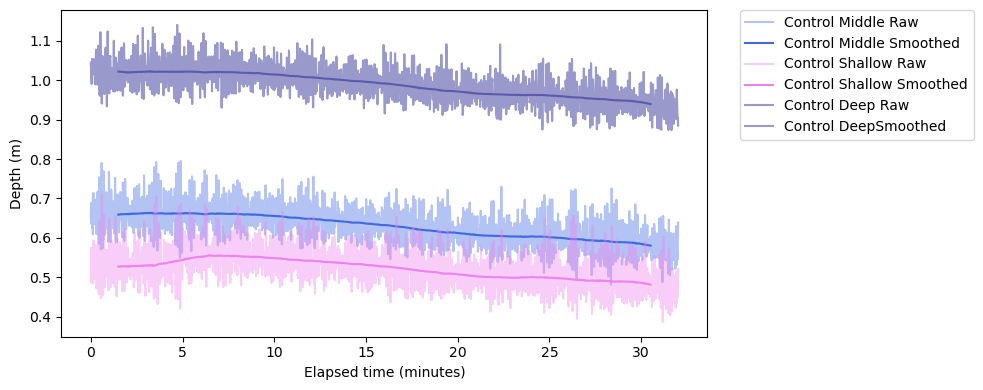

In [16]:
# first, grab the first time
t0_yellow2 = df_yellow2['Time'].iloc[0]
# then, subtract that time from the time series, and convert to seconds, and save as numpy array
t_min_yellow2 = (df_yellow2['Time'] - t0_yellow2).dt.total_seconds().to_numpy()/60
# print it to demonstrate
t_min_yellow2

# Do same for the others
t0_blue2 = df_blue2['Time'].iloc[0]
t_min_blue2 = (df_blue2['Time'] - t0_blue2).dt.total_seconds().to_numpy()/60

t0_green2 = df_green2['Time'].iloc[0]
t_min_green2 = (df_green2['Time'] - t0_green2).dt.total_seconds().to_numpy()/60

t0_red2 = df_red2['Time'].iloc[0]
t_min_red2 = (df_red2['Time'] - t0_red2).dt.total_seconds().to_numpy()/60

# make a plot, replacing x-axis with the elapsed time arrays
plt.figure( figsize = (10,4) )
plt.plot( t_min_yellow2, df_yellow2['Depth'],c='royalblue', label = 'Control Middle Raw', alpha=0.4)
plt.plot( t_min_yellow2, df_yellow2['Smoothed Depth'],c='royalblue', label = 'Control Middle Smoothed')

plt.plot( t_min_green2, df_green2['Depth'],c='violet', label = 'Control Shallow Raw', alpha=0.4)
plt.plot( t_min_green2, df_green2['Smoothed Depth'],c='violet', label = 'Control Shallow Smoothed')

plt.plot( t_min_red2, df_red2['Depth'],c='navy', label='Control Deep Raw', alpha=0.4)
plt.plot( t_min_red2, df_red2['Smoothed Depth'],c='navy', label='Control DeepSmoothed', alpha=0.4)

plt.ylabel( 'Depth (m)' )
#plt.xticks(rotation=-45) # don't need to rotate the x-axis labels
plt.xlabel('Elapsed time (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('Experiment22Graph.png',dpi=200)
plt.tight_layout()
plt.show()

In [ ]:
def residual_stats( df ):

    # Residual
    res = df["Depth"] - df["Smoothed Depth"]
    # add to the dataframe, remove nans
    dfr = df.copy().dropna()
    dfr['Waves'] = res

    # NaN-safe statistics
    mean_s = np.nanmean( dfr['Smoothed Depth'].to_numpy() )
    mean_r = np.nanmean(res)
    std_r  = np.nanstd(res, ddof=1)   # sample standard deviation
    rms_r  = np.sqrt(np.nanmean(res**2))
    print( f"Smoothed Mean: {mean_s:.4f}\nResidual Mean: {mean_r:.4f}\nStd. Dev. {std_r:.4f}\nRMS: {rms_r:.4f}" )

    return dfr


In [ ]:
print('Blue')
df_blue1r = residual_stats( df_blue1 )
print('Red')
df_red1r = residual_stats( df_red1 )
print('Yellow')
df_yellow1r = residual_stats( df_yellow1 )
print('Green')
df_green1r = residual_stats( df_green1 )

In [ ]:
print('Blue')
df_blue2r = residual_stats( df_blue2 )
print('Red')
df_red2r = residual_stats( df_red2 )
print('Yellow')
df_yellow2r = residual_stats( df_yellow2 )
print('Green')
df_green2r = residual_stats( df_green2 )

In [ ]:
# plot waves only
plt.figure( figsize = (10,4) )
plt.plot( df_blue1r['Time'], df_blue1r['Waves'],c='blue', label = 'Offshore Waves', alpha=0.4)
plt.plot( df_green1r['Time'], df_green1r['Waves'],c='green', label = 'Grass Waves', alpha=0.4)
plt.plot( df_red1r['Time'], df_red1r['Waves'],c='red', label = 'Rocks Waves', alpha=0.4)


plt.ylabel( 'Wave Height (m)' )
plt.xlabel( 'Time in Minutes' )
plt.ylim(-0.10, 0.15)
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.savefig('Waves1Graph.png',dpi=200)
plt.show()

In [ ]:
# plot waves only
plt.figure( figsize = (10,4) )
plt.plot( df_yellow2r['Time'], df_yellow2r['Waves'],c='gold', label = 'Control Middle Waves', alpha=0.4)
plt.plot( df_green2r['Time'], df_green2r['Waves'],c='green', label = 'Control Shallow Waves', alpha=0.4)
plt.plot( df_red2r['Time'], df_red2r['Waves'],c='red', label = 'Control Deep Waves', alpha=0.4)


plt.ylabel( 'Wave Height (m)' )
plt.xlabel( 'Time in Minutes' )
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.savefig('Waves2Graph.png',dpi=200)
plt.show()

In [ ]:
df_green2r.describe() #do this for all four sensors in both locations

In [ ]:
# Save the processed files for each experiment in .csv format
data_dir = "/Users/sophiafamely/Documents/ScienceFair2526/Data" # change this for yor code
# Get rid of the duplicate time column I thought we needed for plotting
df_blue1r = df_blue1r.drop(columns=["Time"], errors="ignore")
df_yellow1r = df_yellow1r.drop(columns=["Time"], errors="ignore")
df_red1r = df_red1r.drop(columns=["Time"], errors="ignore")
df_green1r = df_green1r.drop(columns=["Time"], errors="ignore")

df_blue2r = df_blue2r.drop(columns=["Time"], errors="ignore")
df_yellow2r = df_yellow2r.drop(columns=["Time"], errors="ignore")
df_red2r = df_red2r.drop(columns=["Time"], errors="ignore")
df_green2r = df_green2r.drop(columns=["Time"], errors="ignore")

df_blue1r.to_csv(data_dir+"blue1r.csv", index=True)
df_blue2r.to_csv(data_dir+"blue2r.csv", index=True)
df_yellow1r.to_csv(data_dir+"yellow1r.csv", index=True)
df_yellow2r.to_csv(data_dir+"yellow2r.csv", index=True)

df_red1r.to_csv(data_dir+"red1r.csv", index=True)
df_red2r.to_csv(data_dir+"red2r.csv", index=True)
df_green1r.to_csv(data_dir+"green1r.csv", index=True)
df_green2r.to_csv(data_dir+"green2r.csv", index=True)